In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv('ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [ ]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [ ]:
ml_df=df[df['job_title']=='ML Engineer']
ml_df.head()
sal_by_exp=ml_df.groupby('experience_level')['salary_in_usd'].mean()
sal_by_exp

experience_level
EN     18489.500000
MI    118206.818182
SE    192701.380952
Name: salary_in_usd, dtype: float64

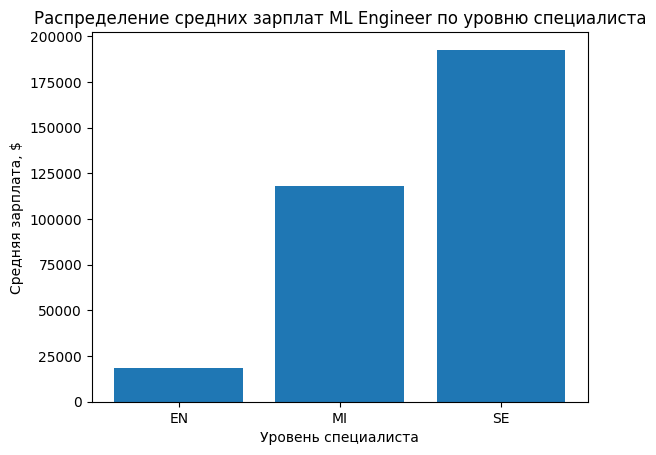

In [ ]:
plt.bar(sal_by_exp.index, sal_by_exp.values)
plt.xlabel('Уровень специалиста')
plt.ylabel('Средняя зарплата, $')
plt.title('Распределение средних зарплат ML Engineer по уровню специалиста')
plt.show()

In [ ]:
df['work_year'].unique()

array([2023, 2022, 2020, 2021])

До этого мы получили распределение средних зарплат специалистов по всем годам. Теперь сделаем это для 2021 и 2023 годов

Примечание: будем брать в расчет только работников, которые трудоустроены Full Time

In [ ]:
data_2021=df.loc[(df['work_year'] == 2021) & (df['employment_type'] == 'FT')]
data_2023=df.loc[(df['work_year'] == 2023) & (df['employment_type'] == 'FT')]

In [ ]:
data_2021.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
776,2021,MI,FT,Data Science Lead,150000,USD,150000,US,100,US,M
1118,2021,MI,FT,AI Scientist,30000,USD,30000,GH,0,GH,S
1444,2021,EN,FT,Marketing Data Engineer,90000,SGD,66970,SG,50,SG,L
1738,2021,SE,FT,Data Scientist,4000000,INR,54094,IN,100,IN,L
2032,2021,MI,FT,Data Analyst,1250000,INR,16904,IN,50,IN,L


In [ ]:
sal_2021=data_2021.groupby('experience_level')['salary_in_usd'].mean()
sal_2023=data_2023.groupby('experience_level')['salary_in_usd'].mean()

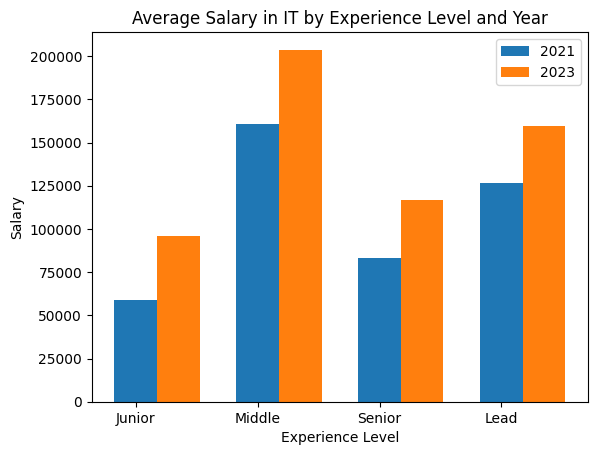

In [ ]:
bar_width = 0.35
bar_positions_2021 = np.arange(len(sal_2021))
bar_positions_2023 = [x + bar_width for x in bar_positions_2021]

# Создаем столбчатую диаграмму
plt.bar(bar_positions_2021, sal_2021, width=bar_width, label='2021')
plt.bar(bar_positions_2023, sal_2023, width=bar_width, label='2023')


x_labels = ['Junior', 'Middle', 'Senior', 'Lead']
plt.xticks(bar_positions_2021, x_labels)
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.title('Average Salary in IT by Experience Level and Year')

# Добавляем легенду
plt.legend()

# Отображаем график
plt.show()

Далее я посмотрю, как зависит средняя зарплата Middle Data Scientist специалистов от типа работы (в офисе или удаленно)

In [ ]:
us_df_remote = df.loc[(df['company_location'] == 'US') & 
                      (df['employment_type'] == 'FT') & 
                      (df['remote_ratio'] == 100) & 
                      (df['experience_level'] == 'MI') & 
                      (df['job_title'] == 'Data Scientist')]
us_df_office = df.loc[(df['company_location'] == 'US') & 
                      (df['employment_type'] == 'FT') & 
                      (df['remote_ratio'] == 0) & 
                      (df['experience_level'] == 'MI') & 
                      (df['job_title'] == 'Data Scientist')]



In [ ]:
us_df_office.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
689,2023,MI,FT,Data Scientist,145000,USD,145000,US,0,US,M
690,2023,MI,FT,Data Scientist,100000,USD,100000,US,0,US,M
699,2023,MI,FT,Data Scientist,145000,USD,145000,US,0,US,M
700,2023,MI,FT,Data Scientist,100000,USD,100000,US,0,US,M
789,2023,MI,FT,Data Scientist,128750,USD,128750,US,0,US,M


In [ ]:
us_df_remote.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
336,2023,MI,FT,Data Scientist,93918,USD,93918,US,100,US,M
337,2023,MI,FT,Data Scientist,51962,USD,51962,US,100,US,M
387,2023,MI,FT,Data Scientist,180000,USD,180000,US,100,US,M
388,2023,MI,FT,Data Scientist,140000,USD,140000,US,100,US,M
824,2023,MI,FT,Data Scientist,200000,USD,200000,US,100,US,M


In [ ]:
rem_sal = us_df_remote['salary_in_usd'].mean()

In [ ]:
off_sal = us_df_office['salary_in_usd'].mean()

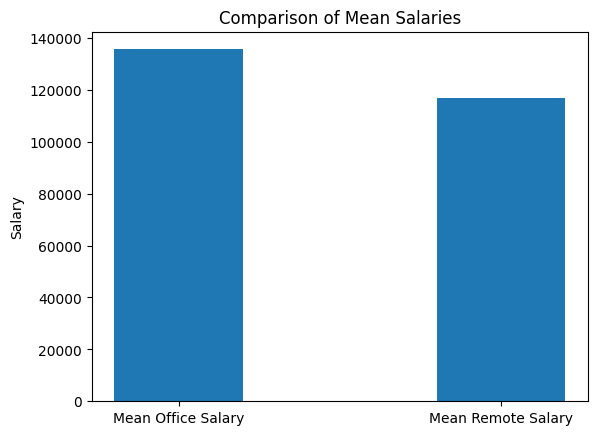

In [ ]:
# Задаем метки для осей
labels = ['Mean Office Salary', 'Mean Remote Salary']

# Задаем позиции для столбцов
x_positions = [0, 0.05]

# Строим гистограмму
plt.bar(x_positions, [off_sal, rem_sal], width=0.02)

# Добавляем метки для осей и заголовок
plt.xticks(x_positions, labels)
plt.ylabel('Salary')
plt.title('Comparison of Mean Salaries')

# Отображаем график
plt.show()

In [ ]:
df['salary_currency'].unique()

array(['EUR', 'USD', 'INR', 'HKD', 'CHF', 'GBP', 'AUD', 'SGD', 'CAD',
       'ILS', 'BRL', 'THB', 'PLN', 'HUF', 'CZK', 'DKK', 'JPY', 'MXN',
       'TRY', 'CLP'], dtype=object)

In [ ]:
df['company_size'].unique()

array(['L', 'S', 'M'], dtype=object)

In [ ]:
plot_df=df.loc[(df['job_title'] == 'Data Analyst') | 
                      (df['job_title'] == 'ML Engineer') | 
                      (df['job_title'] == 'Data Scientist')]
plot_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3741,2020,MI,FT,Data Scientist,118000,USD,118000,US,100,US,M
3742,2020,MI,FT,Data Scientist,138350,USD,138350,US,100,US,M
3746,2021,MI,FT,Data Scientist,160000,SGD,119059,SG,100,IL,M
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L


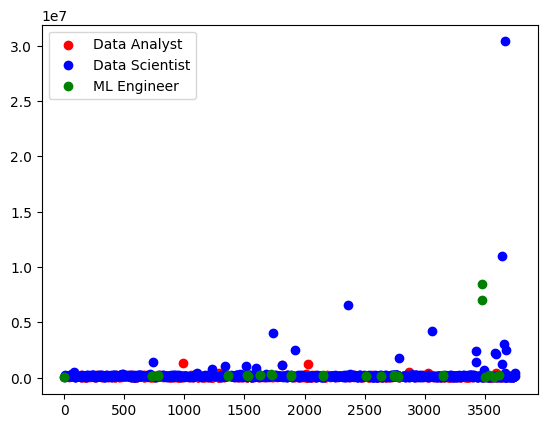

In [ ]:
colors = {'Data Scientist': 'blue', 'Data Analyst': 'red', 'ML Engineer': 'green'}

# Построение точечной диаграммы
for job_title, group in plot_df.groupby('job_title'):
    plt.scatter(group.index, group['salary'], color=colors[job_title], label=job_title)

# Добавление легенды
plt.legend()

# Отображение графика
plt.show()